In [149]:
%load_ext autoreload
%autoreload 2

import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from typing import List
from time import time

# from utils import get_x, get_y, load_img

from utils import OrthoLoader

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
x = 464999
y = 5767000

radius = 100

data_dir = "data/orthophotos/nw"

In [4]:
def crop_and_resize(image: np.ndarray, radius: int) -> Image:
    pass

We need to do some stitching !
Longitude is same
Load files data/orthophotos/nw/dop10rgbi_32_464_5766_1_nw_2022.jp2 and data/orthophotos/nw/dop10rgbi_32_464_5767_1_nw_2022.jp2


/Users/pt/hacking/hire-me/.venv/lib/python3.10/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Concat files data/orthophotos/nw/dop10rgbi_32_464_5766_1_nw_2022.jp2 and data/orthophotos/nw/dop10rgbi_32_464_5767_1_nw_2022.jp2 along the Y-axis
Longitude is same
Load files data/orthophotos/nw/dop10rgbi_32_465_5766_1_nw_2022.jp2 and data/orthophotos/nw/dop10rgbi_32_465_5767_1_nw_2022.jp2
Concat files data/orthophotos/nw/dop10rgbi_32_465_5766_1_nw_2022.jp2 and data/orthophotos/nw/dop10rgbi_32_465_5767_1_nw_2022.jp2 along the Y-axis


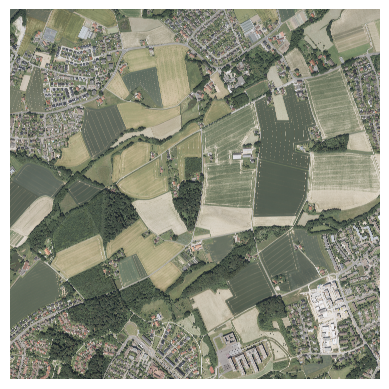

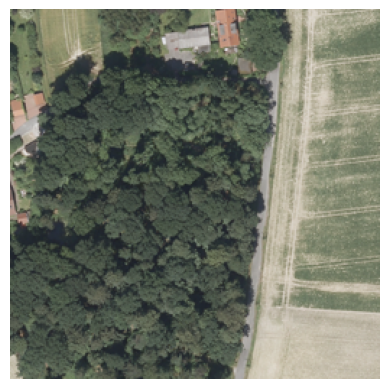

In [137]:
# def get_files(lat: int, long: int, radius: int = 100, data_dir: str = "data/orthophotos/nw/") -> list[str]:
    # return all necessary filenames for the requested range

file_names = sorted(os.listdir(data_dir))

# determine the available range in our data and check if the desired values fit
file_longs = [get_x(file_path=file_name) for file_name in file_names]
file_lats = [get_y(file_path=file_name) for file_name in file_names]

file_min_long, file_max_long = min(file_longs), max(file_longs) + 999
file_min_lat, file_max_lat = min(file_lats), max(file_lats) + 999

assert file_min_long <= x <= file_max_long, f"Longitude value should be between {file_min_long} and {file_max_long}. Actual value: {x}"
assert file_min_lat <= y <= file_max_lat, f"Latitude value should be between {file_min_lat} and {file_max_lat}. Actual value: {y}"

# determine the desired area to choose files
x_min_crop, x_max_crop = x - radius, x + radius
y_min_crop, y_max_crop = y - radius, y + radius

# get all files for the longitudinal fit
long_files = [file for file in file_names if (str(int(x_min_crop/1000)) in file or str(int(x_max_crop / 1000)) in file)]
# from those get all the files for the latitudinal range
target_files = [file for file in long_files if (str(int(y_min_crop/1000)) in file or str(int(y_max_crop / 1000)) in file)]
target_files = [f"{data_dir}/{file}" for file in target_files]
# now these files would need to be stitched together:
if len(target_files) == 1:
    # yeah still need to load it though
    _map = target_files[0]
elif len(target_files) > 1:
    print("We need to do some stitching !")
    _map = stitch_images(target_files)

big_img = Image.fromarray(_map)
plt.imshow(big_img)
plt.axis("off")
plt.show()

x_min_map, x_max_map, y_min_map, y_max_map = get_image_coords(target_files)
x_start = (x_min_crop - x_min_map) *10
x_end = (x_max_crop - x_min_map) * 10
y_start = (y_min_crop - y_min_map) *10
y_end = (y_max_crop - y_min_map) * 10

# TODO: draw a red cross where the desired point should be
crop = _map[y_start:y_end, x_start:x_end]


# TODO: resize to 256x256
crop_img = Image.fromarray(crop)
crop_resize = crop_img.resize((256, 256))

plt.imshow(crop_resize)
plt.axis("off")
plt.show()

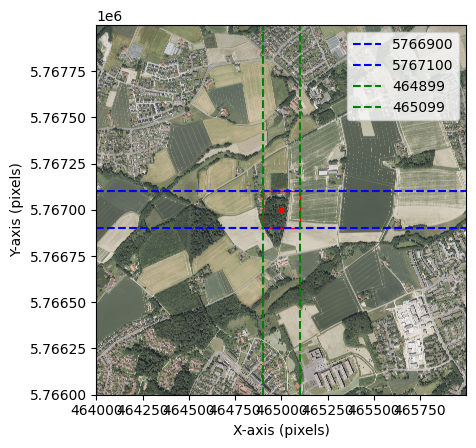

In [138]:
x_index = x - x_min_map
y_index = y - y_min_map

# Plotting the image
plt.imshow(_map, extent=[x_min_map, x_max_map, y_min_map, y_max_map])

# Marking the specific axis values
plt.axhline(y=5766900, color='blue', linestyle='--', label='5766900')
plt.axhline(y=5767100, color='blue', linestyle='--', label='5767100')
plt.axvline(x=464899, color='green', linestyle='--', label='464899')
plt.axvline(x=465099, color='green', linestyle='--', label='465099')

# Drawing a red point
plt.scatter(x, y, color='red', s=10)

# Drawing a red rectangle
rect = plt.Rectangle((x_min_crop, y_min_crop), x_max_crop - x_min_crop, y_max_crop - y_min_crop,
                     linewidth=1, edgecolor='red', facecolor='none')
plt.gca().add_patch(rect)

plt.legend()

# Display the plot
plt.show()

In [183]:
loader = OrthoLoader(x=x, y=y, radius=radius, data_dir=data_dir)

In [179]:
loader.target_files = ['data/orthophotos/nw/dop10rgbi_32_464_5766_1_nw_2022.jp2']

In [184]:
loader.target_files

['data/orthophotos/nw/dop10rgbi_32_464_5766_1_nw_2022.jp2',
 'data/orthophotos/nw/dop10rgbi_32_464_5767_1_nw_2022.jp2',
 'data/orthophotos/nw/dop10rgbi_32_465_5766_1_nw_2022.jp2',
 'data/orthophotos/nw/dop10rgbi_32_465_5767_1_nw_2022.jp2']

In [176]:
if len(loader.target_files) > 1:
    _map = loader.stitch_images()
else:
    _map = loader.load_img()

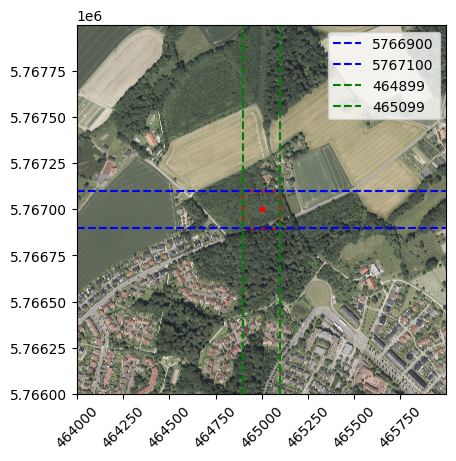

In [180]:
loader.plot_map(_map, target=True)

In [181]:
cropped = loader.crop_and_resize(_map)

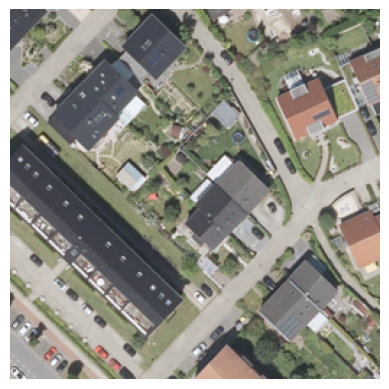

In [182]:
loader.plot_map(cropped)